In [1]:
import requests
import json
import pandas as pd
import schedule
import time
from datetime import datetime

In [2]:
def result():
    data = requests.get('https://resultados.tse.jus.br/oficial/ele2022/544/dados-simplificados/br/br-c0001-e000544-r.json')
    json_data = json.loads(data.content) 
    candidato=[]
    partido = []
    votos = []
    porcentagem = []
    for informacoes in json_data['cand']:
            candidato.append(informacoes['nm'])
            votos.append(informacoes['vap'])
            porcentagem.append(informacoes['pvap'])
    df_eleicao = pd.DataFrame(list(zip(candidato,votos,porcentagem)),columns = ['Candidato','Votos','Porcentagem'])
    return df_eleicao

In [3]:
df = result()
df['Votos'] = df.Votos.apply(lambda x: int(x))
df['Porcentagem']=df.Porcentagem.apply(lambda x: float(x.replace(',','.')))

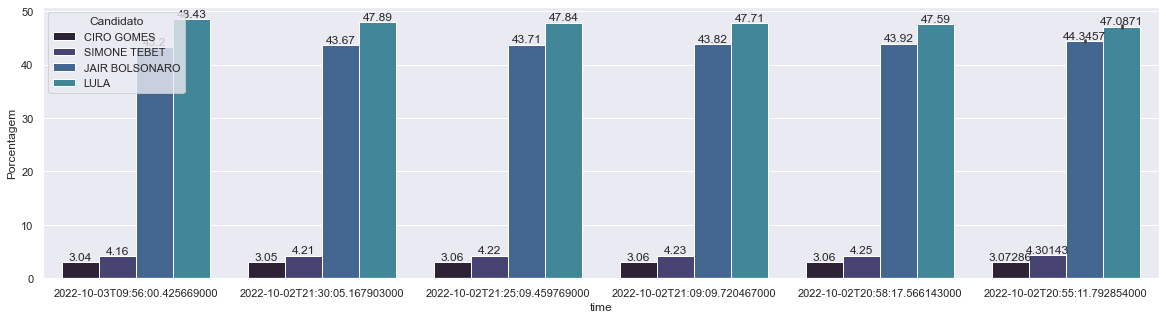

In [29]:
x = result()
x['time'] = datetime.now()
x['Votos'] = x.Votos.apply(lambda x: int(x))
x['Porcentagem']=x.Porcentagem.apply(lambda x: float(x.replace(',','.')))
df = pd.concat([df,x])
import seaborn as sns
df.query("Porcentagem > 2",inplace=True)
df.sort_values(by='time',ascending=False,inplace=True)
sns.set(rc={'figure.figsize':(20,5)})
sns.set_theme(style="darkgrid", palette="mako")
ax = sns.barplot(x=df.time, y=df.Porcentagem, hue=df.Candidato)
for i in ax.containers:
    ax.bar_label(i,)